<a href="https://colab.research.google.com/github/The3seus/ArtGeneratorRGB/blob/main/ArtGeneratorRGBGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount Google Drive to store files & data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1) Importing Python Packages for GAN**


In [2]:
# from keras.datasets import cifar10, mnist

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D, Dense, Conv2DTranspose
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam 
import numpy as np
!mkdir generated_images resized_images

In [4]:
#!mkdir finalart
!tar -xvf digitalcyber.tar.gz -C /content/drive/MyDrive/ColabNotebooks/Datasets/


digitalcyber/
digitalcyber/images240.jpg
digitalcyber/images307.jpg
digitalcyber/images315.jpg
digitalcyber/images145.jpg
digitalcyber/images127.jpg
digitalcyber/image19.jpeg
digitalcyber/images15.jpg
digitalcyber/images360.jpg
digitalcyber/images558.jpg
digitalcyber/images533.jpg
digitalcyber/images262.jpg
digitalcyber/cyberpunk-neon-girl-digital-art-82.jpg
digitalcyber/images517.jpg
digitalcyber/4-8.jpg
digitalcyber/images135.jpg
digitalcyber/images531.jpg
digitalcyber/images81.jpg
digitalcyber/images527.jpg
digitalcyber/images30.jpg
digitalcyber/1111-4.jpg
digitalcyber/images416.jpg
digitalcyber/images356.jpg
digitalcyber/images455.jpg
digitalcyber/images496.jpg
digitalcyber/images88.jpg
digitalcyber/images323.jpg
digitalcyber/0aop33lsvad9ckrnalurxkys.png
digitalcyber/images54.jpg
digitalcyber/images138.jpg
digitalcyber/images335.jpg
digitalcyber/cyberpunk-girl-digital-art-lw.jpg
digitalcyber/images514.jpg
digitalcyber/images504.jpg
digitalcyber/images544.jpg
digitalcyber/images620.

In [5]:
images_path = "/content/drive/MyDrive/ColabNotebooks/Datasets/digitalcyber/"
#resized_images = "/content/resized_images/"

## **Resizing Data to match Neural Network Input**

In [14]:
#!mkdir resized_images
import os
from PIL import Image
import cv2
reshape_size = (128,128)

i = 0
for image in os.listdir(images_path):
   #print(image)
  #img = cv2.imread("/content/cyberart/cyberpunk/" + image)
  img = cv2.imread(images_path + image)
  img = cv2.resize(img, reshape_size)
  cv2.imwrite("resized_images/%d.png" % i,img)
  #cv2.imwrite("resized_images/%d.jpeg" % i,img)
  # # print(img.shape)
  i = i+1


## **2) Parameters for Neural Networks & Data**

In [15]:
img_width = 128
img_height = 128
channels = 3
img_shape = (img_width, img_height, channels)
latent_dim = 100
adam = Adam(learning_rate=0.0002)

## **3) Building Generator**





In [16]:
def build_generator():
    model = Sequential()
    #to determine the input layer divide img_width /2 /2 /2 = 16 
    model.add(Dense(256 * 16* 16, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((16,16,256)))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  
    model.summary()

    return model

generator = build_generator()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 65536)             6619136   
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 65536)             0         
                                                                 
 reshape_1 (Reshape)         (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 32, 32, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 64, 64, 128)      262272    
 ranspose)                                            

## **4) Building Discriminator**

In [17]:
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), padding='same', ))
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()
    return model

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 128, 128, 128)     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 128, 128, 128)     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 256)    

## **5) Connecting Neural Networks to build GAN**

In [18]:
GAN = Sequential()
discriminator.trainable = False
GAN.add(generator)
GAN.add(discriminator)
GAN.summary()

GAN.compile(loss='binary_crossentropy', optimizer=adam)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       7671555   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 4712705   
                                                                 
Total params: 12,384,260
Trainable params: 7,671,555
Non-trainable params: 4,712,705
_________________________________________________________________


In [ ]:
# generator.summary()
# discriminator.summary()

## **6) Outputting Images**


In [19]:
#@title
## **7) Outputting Images**
import matplotlib.pyplot as plt
import glob
import imageio
import PIL

save_name = 0.00000000

def save_imgs(epoch):
    r, c = 4, 4
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    global save_name
    save_name += 0.00000001

    # Rescale images 0 - 1
    gen_imgs = (gen_imgs + 1) / 2.0

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt])
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("currentgeneration.png")
    fig.savefig("generated_images/%.8f.png" % save_name)
    plt.close()

## **7) Training GAN**

In [20]:
from PIL import Image
import os

array = []
path = '/content/resized_images/'

for image in os.listdir(path):
  image = Image.open(path + image)
  data = np.asarray(image)
  array.append(data)


  X_train = np.array(array)
  X_train = X_train / 127.5 -1.
  print(X_train.shape)


(1, 128, 128, 3)
(2, 128, 128, 3)
(3, 128, 128, 3)
(4, 128, 128, 3)
(5, 128, 128, 3)
(6, 128, 128, 3)
(7, 128, 128, 3)
(8, 128, 128, 3)
(9, 128, 128, 3)
(10, 128, 128, 3)
(11, 128, 128, 3)
(12, 128, 128, 3)
(13, 128, 128, 3)
(14, 128, 128, 3)
(15, 128, 128, 3)
(16, 128, 128, 3)
(17, 128, 128, 3)
(18, 128, 128, 3)
(19, 128, 128, 3)
(20, 128, 128, 3)
(21, 128, 128, 3)
(22, 128, 128, 3)
(23, 128, 128, 3)
(24, 128, 128, 3)
(25, 128, 128, 3)
(26, 128, 128, 3)
(27, 128, 128, 3)
(28, 128, 128, 3)
(29, 128, 128, 3)
(30, 128, 128, 3)
(31, 128, 128, 3)
(32, 128, 128, 3)
(33, 128, 128, 3)
(34, 128, 128, 3)
(35, 128, 128, 3)
(36, 128, 128, 3)
(37, 128, 128, 3)
(38, 128, 128, 3)
(39, 128, 128, 3)
(40, 128, 128, 3)
(41, 128, 128, 3)
(42, 128, 128, 3)
(43, 128, 128, 3)
(44, 128, 128, 3)
(45, 128, 128, 3)
(46, 128, 128, 3)
(47, 128, 128, 3)
(48, 128, 128, 3)
(49, 128, 128, 3)
(50, 128, 128, 3)
(51, 128, 128, 3)
(52, 128, 128, 3)
(53, 128, 128, 3)
(54, 128, 128, 3)
(55, 128, 128, 3)
(56, 128, 128, 3)
(

In [ ]:
from PIL import Image

def train(epochs, batch_size=32, save_interval=200):
  #(X_train, _), (_, _) = cifar10.load_data()

  bat_per_epo = int(X_train.shape[0] / batch_size)
  # X_train = np.expand_dims(X_train, axis=3)
  # print(X_train.shape)

  #Create our Y for our Neural Networks
  valid = np.ones((batch_size, 1))
  fakes = np.zeros((batch_size, 1))

  for epoch in range(epochs):
    for j in range(bat_per_epo):
      #Get Random Batch
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      imgs = X_train[idx]

      #Generate Fake Images
      noise = np.random.normal(0, 1, (batch_size, latent_dim))
      gen_imgs = generator.predict(noise)

      #Train discriminator
      d_loss_real = discriminator.train_on_batch(imgs, valid)
      d_loss_fake = discriminator.train_on_batch(gen_imgs, fakes)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      noise = np.random.normal(0, 1, (batch_size, latent_dim))
      
      #inverse y label
      g_loss = GAN.train_on_batch(noise, valid)

      print("******* %d %d [D loss: %f, acc: %.2f%%] [G loss: %f]" % (epoch,j, d_loss[0], 100* d_loss[1], g_loss))

      # if(epoch % save_interval) == 0:
    save_imgs(epoch)


train(30000, batch_size=32, save_interval=200)

Streaming output truncated to the last 5000 lines.
******* 105 17 [D loss: 0.006236, acc: 100.00%] [G loss: 8.466302]
1/1 [==============================] - 0s 15ms/step
******* 105 18 [D loss: 0.008060, acc: 100.00%] [G loss: 8.670914]
1/1 [==============================] - 0s 15ms/step
******* 105 19 [D loss: 0.141717, acc: 93.75%] [G loss: 5.649356]
1/1 [==============================] - 0s 15ms/step
******* 105 20 [D loss: 0.179441, acc: 95.31%] [G loss: 5.539461]
1/1 [==============================] - 0s 16ms/step
******* 105 21 [D loss: 0.004587, acc: 100.00%] [G loss: 10.133544]
1/1 [==============================] - 0s 16ms/step
******* 105 22 [D loss: 0.020594, acc: 100.00%] [G loss: 11.962001]
1/1 [==============================] - 0s 19ms/step
******* 106 0 [D loss: 0.077161, acc: 98.44%] [G loss: 13.004175]
1/1 [==============================] - 0s 15ms/step
******* 106 1 [D loss: 0.264103, acc: 90.62%] [G loss: 4.868741]
1/1 [==============================] - 0s 15ms/step


In [ ]:
noise = np.random.normal(0, 1, (16, latent_dim))
gen_imgs = generator.predict(noise)
gen_imgs = (gen_imgs + 1) / 2.0
# plt.imshow(gen_imgs[2])

1/1 [==============================] - 0s 489ms/step


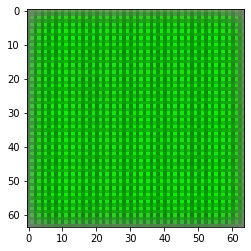

In [ ]:
plt.imshow(gen_imgs[6])

In [ ]:
generator.save_weights("/content/drive/MyDrive/ColabNotebooks/models/generator1hour.h5")
discriminator.save_weights("/content/drive/MyDrive/ColabNotebooks/models/discriminator1hour.h5")

### **8) Making GIF**

In [ ]:
# Display a single image using the epoch number
# def display_image(epoch_no):
#   return PIL.Image.open('generated_images/%.8f.png'.format(epoch_no))

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('generated_images/*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)